# Exploratory Data Analysis

In [112]:
import pandas as pd

life_df = pd.read_csv('data/lifeexp.csv')
deprivation_df = pd.read_csv('data/deprivation.csv')

In [113]:
file_path = 'data/lifeexp.csv'
df = pd.read_csv(file_path)
print("Total columns:", len(df.columns))
print("\nAll column names:")
print(df.columns.tolist())

print("\nFirst 5 rows:")
print(df.head(5).to_string())

Total columns: 13

All column names:
['Males', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Females', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12']

First 5 rows:
  Males Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  Unnamed: 6 Females Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12
0   age         mx         qx         lx         dx         ex         NaN     age         mx         qx          lx          dx          ex
1     0   0.004661   0.004651     100000      465.1      79.39         NaN       0   0.003684   0.003677      100000       367.7        83.3
2     1   0.000251   0.000251    99534.9       24.9      78.76         NaN       1   0.000209   0.000209     99632.3        20.9        82.6
3     2   0.000183   0.000183      99510       18.2      77.78         NaN       2   0.000139   0.000139     99611.4        13.8       81.62
4     3   0.000113   0.000113    99491.8       11.2       76.8   

In [114]:
#extract male columns
male_cols = df.columns[0:6]
df_males = df[male_cols].copy()

df_males.columns = ['age', 'mx', 'qx', 'lx', 'dx', 'ex']

df_males['sex'] = 'Male'

#extract female columns 
female_cols = df.columns[7:13]
df_females = df[female_cols].copy()


df_females.columns = ['age', 'mx', 'qx', 'lx', 'dx', 'ex']

df_females['sex'] = 'Female'

#Combine
df_life = pd.concat([df_males, df_females], ignore_index=True)

In [124]:
print(df_life.head(5).to_string(index=True))

df_life = df_life[pd.to_numeric(df_life['age'], errors='coerce').notna()]

df_life = df_life.astype({
    'age': 'int',
    'mx':  'float',
    'qx':  'float',
    'lx':  'float',
    'dx':  'float',
    'ex':  'float'
})

   age        mx        qx       lx     dx     ex   sex
0  age        mx        qx       lx     dx     ex  Male
1    0  0.004661  0.004651   100000  465.1  79.39  Male
2    1  0.000251  0.000251  99534.9   24.9  78.76  Male
3    2  0.000183  0.000183    99510   18.2  77.78  Male
4    3  0.000113  0.000113  99491.8   11.2   76.8  Male


In [ ]:
df_males = df_males[pd.to_numeric(df_males['age'], errors='coerce').notna()]
df_females = df_females[pd.to_numeric(df_females['age'], errors='coerce').notna()]

for df in [df_males, df_females]:
    df['age'] = pd.to_numeric(df['age'], errors='coerce').astype('Int64')
    for col in ['mx', 'qx', 'lx', 'dx', 'ex']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

df_le = pd.concat([df_males, df_females], ignore_index=True)

df_le = df_le.sort_values(['sex', 'age']).reset_index(drop=True)

In [126]:
print(df_le.head(8).to_string(index=False))

print(df_le.tail(4).to_string(index=False))

print(df_le[df_le['age'] == 0][['sex', 'ex']])

 age       mx       qx       lx    dx    ex    sex
   0 0.003684 0.003677 100000.0 367.7 83.30 Female
   1 0.000209 0.000209  99632.3  20.9 82.60 Female
   2 0.000139 0.000139  99611.4  13.8 81.62 Female
   3 0.000100 0.000100  99597.6   9.9 80.63 Female
   4 0.000081 0.000081  99587.6   8.0 79.64 Female
   5 0.000071 0.000071  99579.6   7.1 78.65 Female
   6 0.000076 0.000076  99572.5   7.5 77.65 Female
   7 0.000065 0.000065  99565.0   6.5 76.66 Female
 age       mx       qx     lx     dx   ex  sex
  97 0.382932 0.321396 3612.9 1161.2 2.28 Male
  98 0.406803 0.338044 2451.7  828.8 2.12 Male
  99 0.446228 0.364830 1622.9  592.1 1.95 Male
 100 0.508949 0.405707 1030.8  418.2 1.78 Male
        sex     ex
0    Female  83.30
101    Male  79.39


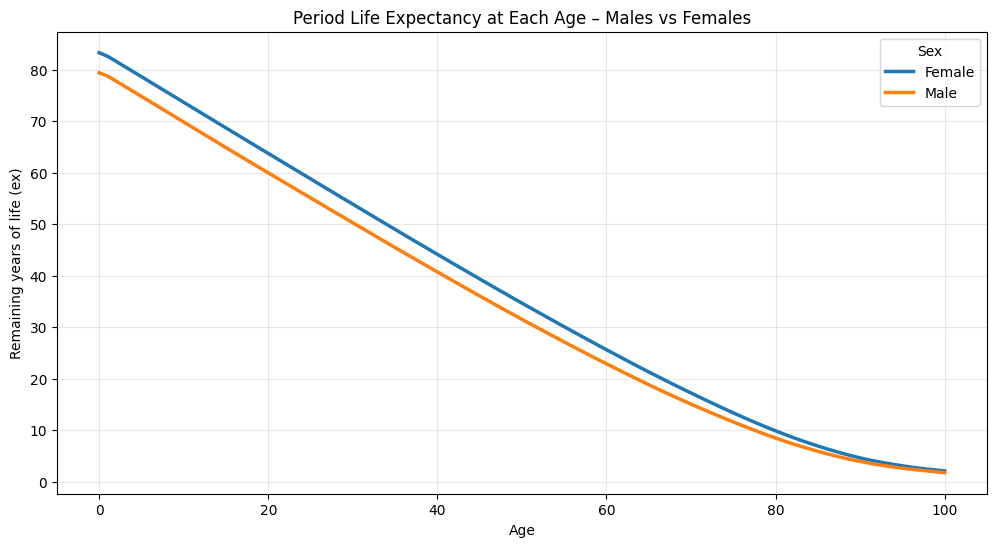

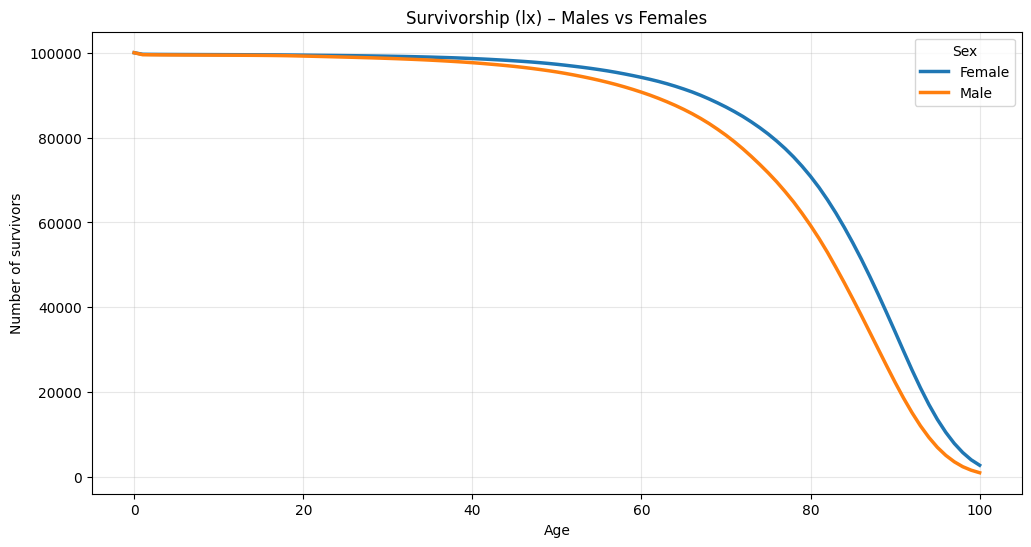

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_le, x='age', y='ex', hue='sex', linewidth=2.5)
plt.title('Period Life Expectancy at Each Age – Males vs Females')
plt.xlabel('Age')
plt.ylabel('Remaining years of life (ex)')
plt.grid(True, alpha=0.3)
plt.legend(title='Sex')
plt.show()

# Survivorship curve
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_le, x='age', y='lx', hue='sex', linewidth=2.5)
plt.title('Survivorship (lx) – Males vs Females')
plt.xlabel('Age')
plt.ylabel('Number of survivors')
plt.grid(True, alpha=0.3)
plt.legend(title='Sex')
plt.show()

In [127]:
le_birth = df_le[df_le['age'] == 0].set_index('sex')['ex']
gap = le_birth['Female'] - le_birth['Male']
print(f"National female-male LE gap at birth: {gap:.2f} years")

National female-male LE gap at birth: 3.91 years


In [118]:
print(deprivation_df.columns.tolist())
print(deprivation_df.head(5))

['Upper Tier Local Authority District code (2024)', 'Upper Tier Local Authority District name (2024)', 'IMD - Average rank ', 'IMD - Rank of average rank ', 'IMD - Average score ', 'IMD - Rank of average score ', 'IMD - Proportion of LSOAs in most deprived 10% nationally ', 'IMD - Rank of proportion of LSOAs in most deprived 10% nationally ', 'IMD25 - Extent ', 'IMD25 - Rank of extent ', 'IMD25 - Local concentration ', 'IMD25 - Rank of local concentration ']
  Upper Tier Local Authority District code (2024)  \
0                                       E06000001   
1                                       E06000002   
2                                       E06000003   
3                                       E06000004   
4                                       E06000005   

  Upper Tier Local Authority District name (2024)  IMD - Average rank   \
0                                      Hartlepool             23075.98   
1                                   Middlesbrough             23840.54

In [119]:
deprivation_df = deprivation_df.rename(columns={
    'Upper Tier Local Authority District name (2024)': 'Local_Authority',
    'IMD - Average score ': 'Deprivation_Score',
    'IMD - Average rank ': 'IMD_Avg_Rank',
    'IMD - Proportion of LSOAs in most deprived 10% nationally ': 'Deprived_10pct_Proportion'
})

# Quick clean
deprivation_df['Local_Authority'] = deprivation_df['Local_Authority'].str.strip()
print(deprivation_df[['Local_Authority', 'Deprivation_Score']].head(5))

        Local_Authority  Deprivation_Score
0            Hartlepool             37.580
1         Middlesbrough             40.037
2  Redcar and Cleveland             30.336
3      Stockton-on-Tees             25.830
4            Darlington             25.713
